In [847]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [848]:
# filepath = '/data/'
# filename = 'EU_RenewableEng_Prod_05-16.csv'
# df = pd.read_csv(filepath, filename)
filename_path1 = '../data/EU_RenewableEng_Prod_05-16.csv'
df1 = pd.read_csv(filename_path1)

In [849]:
df1.head()

,Year,Country,Units,Product,Indicator,Value
0,2005,Albania,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,694.3
1,2005,Austria,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,7000.5
2,2005,Bosnia and Herzegovina,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,0.0
3,2005,Belgium,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,874.8
4,2005,Bulgaria,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,1123.8


In [850]:
filename_path2 = '../data/CO2Emm_Global_1970-16.csv'

df2 = pd.read_csv(filename_path2)

In [851]:
df2.head()

,ISO_CODE,ISO_NAME,Year,GHG per capita emissions,CO2/cap
0,AFG,Afghanistan,1970,1.557705,0.156962
1,ALB,Albania,1970,3.355742,2.062545
2,DZA,Algeria,1970,4.645362,1.207575
3,AGO,Angola,1970,6.772412,1.191541
4,AIA,Anguilla,1970,0.776791,0.338751


In [852]:
df = pd.merge(df1, df2, how='left', left_on=['Country', 'Year'], right_on=['ISO_NAME', 'Year'])

In [853]:
df.head()

,Year,Country,Units,Product,Indicator,Value,ISO_CODE,ISO_NAME,GHG per capita emissions,CO2/cap
0,2005,Albania,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,694.3,ALB,Albania,2.652038,1.344544
1,2005,Austria,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,7000.5,AUT,Austria,11.699590,9.736343
2,2005,Bosnia and Herzegovina,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,0.0,BIH,Bosnia and Herzegovina,5.536758,4.434418
3,2005,Belgium,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,874.8,BEL,Belgium,13.568800,10.921950
4,2005,Bulgaria,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,1123.8,BGR,Bulgaria,8.445838,6.754750


In [854]:
allcountries= df.Country.unique()

In [855]:
df.ISO_NAME.unique()

array(['Albania', 'Austria', 'Bosnia and Herzegovina', 'Belgium',
       'Bulgaria', 'Cyprus', nan, 'Germany', 'Denmark', 'Estonia',
       'Greece', 'Finland', 'Georgia', 'Croatia', 'Hungary', 'Ireland',
       'Iceland', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia',
       'Turkey', 'Ukraine'], dtype=object)

In [856]:
df_Ireland = df.loc[(df['Country']=='Ireland') & (df['Product']=='Renewable energies')]

In [857]:
df_Ireland.head()

,Year,Country,Units,Product,Indicator,Value,ISO_CODE,ISO_NAME,GHG per capita emissions,CO2/cap
17,2005,Ireland,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,366.1,IRL,Ireland,17.45080,11.27147
577,2006,Ireland,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,421.5,IRL,Ireland,17.43325,11.36553
1137,2007,Ireland,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,465.6,IRL,Ireland,16.53703,10.83608
1697,2008,Ireland,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,544.5,IRL,Ireland,16.10632,10.46161
2257,2009,Ireland,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,632.1,IRL,Ireland,14.66121,9.15050


In [858]:
df_Ireland.Year.dtype


dtype('int64')

In [859]:
df_Ireland.Value.dtype

dtype('O')

In [860]:
#dataframe is copy of a slice? correct error
df_Ire = df_Ireland.copy()
df_Ire['Value']= df_Ire.Value.apply(pd.to_numeric)
df_Ire.head()


,Year,Country,Units,Product,Indicator,Value,ISO_CODE,ISO_NAME,GHG per capita emissions,CO2/cap
17,2005,Ireland,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,366.1,IRL,Ireland,17.45080,11.27147
577,2006,Ireland,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,421.5,IRL,Ireland,17.43325,11.36553
1137,2007,Ireland,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,465.6,IRL,Ireland,16.53703,10.83608
1697,2008,Ireland,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,544.5,IRL,Ireland,16.10632,10.46161
2257,2009,Ireland,Thousand tonnes of oil equivalent (TOE),Renewable energies,Primary production,632.1,IRL,Ireland,14.66121,9.15050


In [861]:
# sns.set_style("darkgrid")
# sns.set_palette("pastel")

# sns.lineplot(data=df_Ire, x='Year', y='Value' )
# sns.lineplot(data=df_Ire, x='Year', y='CO2/cap' )

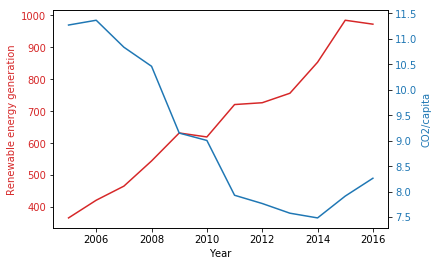

In [862]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Renewable energy generation', color=color)
ax1.plot(df_Ire.Year, df_Ire.Value, color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2 = ax1.twinx()
ax2.set_ylabel('CO2/capita', color=color)
ax2.plot(df_Ire.Year, df_Ire['CO2/cap'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


In [863]:
#Ultimately, to create a prediction model that uses renewable energy generation to predict CO2 for countries that do not have CO2 information

#Let's create the necessary dataframe
# check column headings, keep only ones we want and adapt names, then plot graphs for every country

df.columns 


Index(['Year', 'Country', 'Units', 'Product', 'Indicator', 'Value', 'ISO_CODE',
       'ISO_NAME', 'GHG per capita emissions', 'CO2/cap'],
      dtype='object')

In [864]:
df = df.drop(['Units', 'Indicator', 'ISO_CODE', 'ISO_NAME'], axis=1)

df.rename(columns={'Year':'year',
                  'Country':'country',
                  'Product':'renew_typ',
                  'Value':'renew_ene',
                  'GHG per capita emissions':'ghg',
                  'CO2/cap':'co2'}, inplace='True')

In [865]:
df.head()

,year,country,renew_typ,renew_ene,ghg,co2
0,2005,Albania,Renewable energies,694.3,2.652038,1.344544
1,2005,Austria,Renewable energies,7000.5,11.699590,9.736343
2,2005,Bosnia and Herzegovina,Renewable energies,0.0,5.536758,4.434418
3,2005,Belgium,Renewable energies,874.8,13.568800,10.921950
4,2005,Bulgaria,Renewable energies,1123.8,8.445838,6.754750


In [866]:
df.dtypes

year           int64
country       object
renew_typ     object
renew_ene     object
ghg          float64
co2          float64
dtype: object

In [867]:
df['renew_ene'] = pd.to_numeric(df.renew_ene, errors='coerce')
df['renew_ene'] = df.renew_ene.apply(pd.to_numeric)

In [868]:
df.dtypes

year           int64
country       object
renew_typ     object
renew_ene    float64
ghg          float64
co2          float64
dtype: object

In [869]:
renewabledf = df[df.co2.notnull()]

In [870]:
renew_countries = renewabledf.country.unique()


In [871]:
def two_yaxis(ax1, x, y1, y2, c1, c2, title):
    ax2 = ax1.twinx()
    ax1.plot(x, y1, color=c1)
#     ax1.set_xlabel('Year')
#     ax1.set_ylabel('renewable generation (TOE)')
    ax1.set_title(title)
    ax2.plot(x, y2, color=c2)
#     ax2.set_ylabel('CO2/per capita')

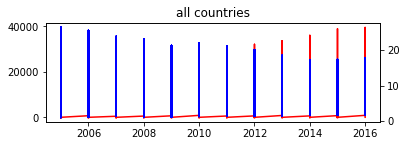

In [872]:
ax = plt.subplot(2,1,1)
two_yaxis(ax, df.year, df.renew_ene, df.co2, 'r', 'b', 'all countries')

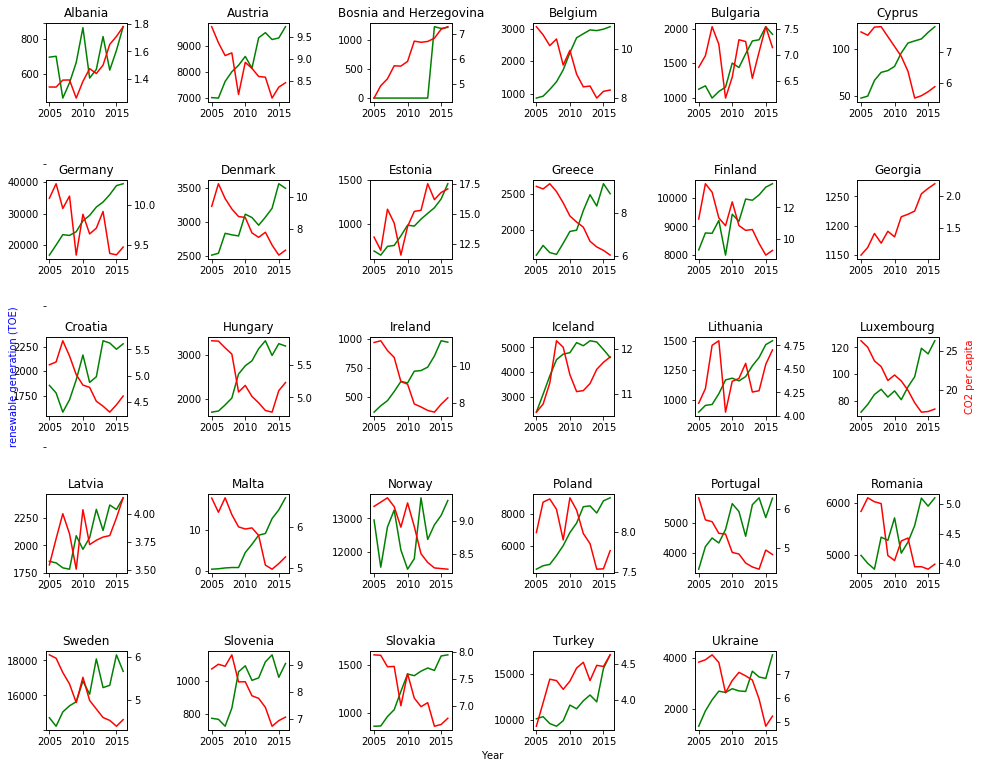

In [873]:
#do subplot for every country
fig = plt.figure(figsize=(16,13))
ax_axis = fig.add_subplot(111)#big subplot for common axis label

ax_axis.set_ylabel('renewable generation (TOE)', color='b')
ax_axis.set_xlabel('Year')
ax_axis.spines['top'].set_color('none')
ax_axis.spines['bottom'].set_color('none')
ax_axis.spines['left'].set_color('none')
ax_axis.spines['right'].set_color('none')
ax_axis.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)


ax_axis2 = ax_axis.twinx()
ax_axis2.set_ylabel('CO2 per capita', color='r')
ax_axis2.spines['top'].set_color('none')
ax_axis2.spines['bottom'].set_color('none')
ax_axis2.spines['left'].set_color('none')
ax_axis2.spines['right'].set_color('none')
ax_axis2.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

fig.subplots_adjust(hspace=1, wspace=1)



for i in range(len(renew_countries)):
    temp = renewabledf[(renewabledf.country==renew_countries[i]) & (renewabledf.renew_typ=='Renewable energies')]
    ax = fig.add_subplot(5,6,i+1)
    two_yaxis(ax, temp.year, temp.renew_ene, temp.co2, 'g', 'r', renew_countries[i])


# plt.show()

In [874]:
y_max = renewabledf.renew_ene.max()
y_max

39481.4

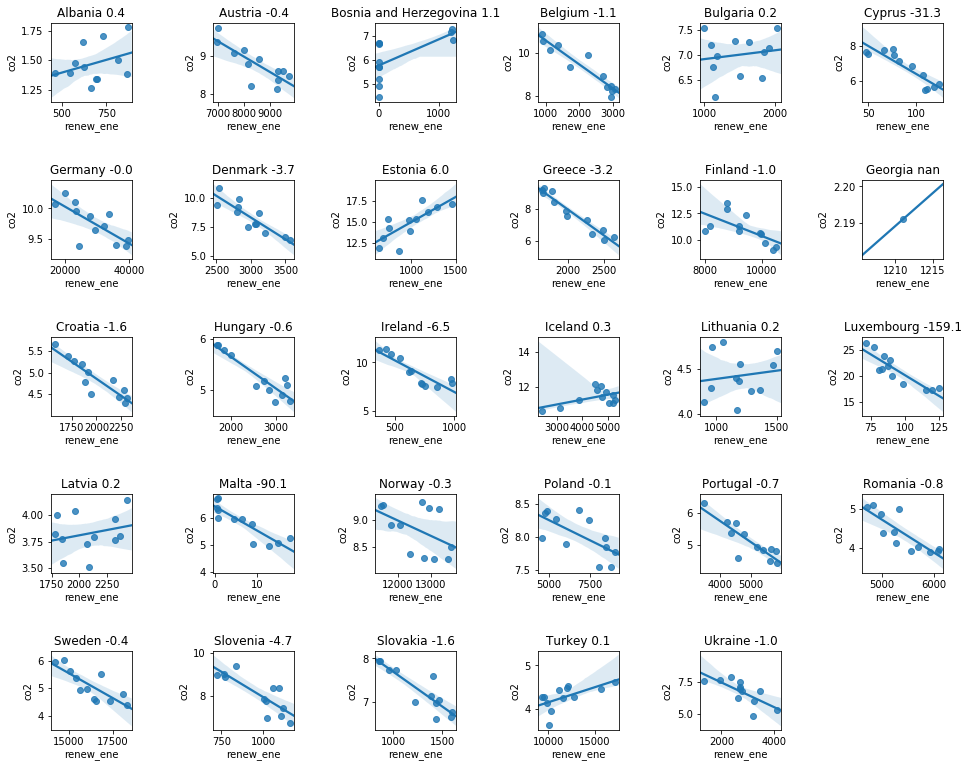

In [875]:
from scipy import stats

fig = plt.figure(figsize=(16,13))
fig.subplots_adjust(hspace=1, wspace=1)


for i in range(len(renew_countries)):
    temp = renewabledf[(renewabledf.country==renew_countries[i]) & (renewabledf.renew_typ=='Renewable energies')]
    
    #get coeffs of linear fit
    slope, intercept, r_value, p_value, std_err = stats.linregress(temp.renew_ene, temp.co2)
    
    ax = fig.add_subplot(5,6,i+1)
    ax = sns.regplot(temp.renew_ene, temp.co2)
    t = renew_countries[i]
    ax.set_title(t + ' {0:.1f}'.format(slope*1000))

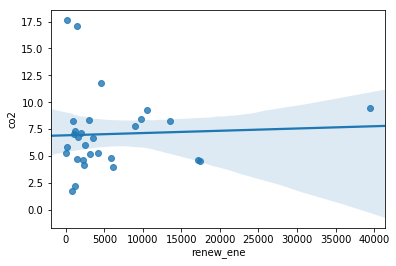

In [876]:

# if use all countries, relationship less obvious. Pick gdp similar to UK?
filtered_df = renewabledf[(renewabledf.renew_typ=='Renewable energies') & (renewabledf.year==2016)]

sns.regplot(filtered_df.renew_ene, filtered_df.co2)

#stronger correlation in later years?

In [877]:
filename_path3 = '../data/GDP_PPP_worldbank.csv'
df3 = pd.read_csv(filename_path3)

df3 = df3[df3['Country Name'].isin(allcountries)]

df3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 33
3,Albania,ALB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,2608.926433,1909.591657,1823.522005,2058.654526,2290.990927,2666.249235,...,9627.937290,10207.718887,10526.280126,10571.003653,11259.279723,11661.981184,11890.500391,12943.460705,NaN,NaN
12,Austria,AUT,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,19452.466362,20585.153015,21259.909721,21700.713356,22607.741902,23658.771081,...,42047.032676,44452.732746,46457.345777,47922.049121,48787.491592,49883.041298,50521.482624,52397.754351,NaN,NaN
15,Belgium,BEL,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,18768.806905,19675.762316,20349.591918,20552.926215,21601.003546,22530.160640,...,40091.009991,41248.725342,42354.631485,43519.777920,44601.367113,45414.890598,46416.854198,47840.197136,NaN,NaN
19,Bulgaria,BGR,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,5191.149544,4959.814879,4754.742908,4834.223294,5043.958589,5320.077820,...,14934.021978,15676.077630,16208.283132,16571.026488,17534.393364,18186.403016,19500.310829,20947.994169,NaN,NaN
22,Bosnia and Herzegovina,BIH,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,949.431367,1202.849749,...,9305.797495,9901.553536,10181.950241,10825.903317,11164.215491,11650.411355,12346.333906,13107.722589,NaN,NaN


In [878]:
df3['Country Name'].unique()
df3 = df3.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

In [879]:
df3_temp = pd.melt(df3, id_vars=['Country Name'], var_name='year', value_name='gdp_ppp')
GDPdf = df3_temp.sort_values(by=['Country Name', 'year'])
GDPdf.head()


,Country Name,year,gdp_ppp
0,Albania,1990,2608.926433
38,Albania,1991,1909.591657
76,Albania,1992,1823.522005
114,Albania,1993,2058.654526
152,Albania,1994,2290.990927


In [880]:
GDPdf.dtypes

GDPdf['year'] = pd.to_numeric(GDPdf.year, downcast='integer', errors='coerce')
GDPdf.head()



,Country Name,year,gdp_ppp
0,Albania,1990.0,2608.926433
38,Albania,1991.0,1909.591657
76,Albania,1992.0,1823.522005
114,Albania,1993.0,2058.654526
152,Albania,1994.0,2290.990927


In [881]:
gdpdf = GDPdf[(GDPdf.year<=2016) & (GDPdf.year>=2005)]
gdpdf.head()

,Country Name,year,gdp_ppp
570,Albania,2005.0,5865.310504
608,Albania,2006.0,6559.777896
646,Albania,2007.0,7276.307768
684,Albania,2008.0,8228.318168
722,Albania,2009.0,8814.847160


In [882]:
alldf = pd.merge(df, gdpdf, how='left', left_on=['country', 'year'], right_on=['Country Name', 'year'])
alldf = alldf.drop(columns=['Country Name'])
alldf.head()

,year,country,renew_typ,renew_ene,ghg,co2,gdp_ppp
0,2005,Albania,Renewable energies,694.3,2.652038,1.344544,5865.310504
1,2005,Austria,Renewable energies,7000.5,11.699590,9.736343,35013.714044
2,2005,Bosnia and Herzegovina,Renewable energies,0.0,5.536758,4.434418,6451.904817
3,2005,Belgium,Renewable energies,874.8,13.568800,10.921950,33332.331350
4,2005,Bulgaria,Renewable energies,1123.8,8.445838,6.754750,10211.274340


In [883]:
missing = pd.isna(alldf)
alldf = alldf.dropna(thresh=3)
countries = alldf.country.unique()
renew_countries

array(['Albania', 'Austria', 'Bosnia and Herzegovina', 'Belgium',
       'Bulgaria', 'Cyprus', 'Germany', 'Denmark', 'Estonia', 'Greece',
       'Finland', 'Georgia', 'Croatia', 'Hungary', 'Ireland', 'Iceland',
       'Lithuania', 'Luxembourg', 'Latvia', 'Malta', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia', 'Turkey',
       'Ukraine'], dtype=object)

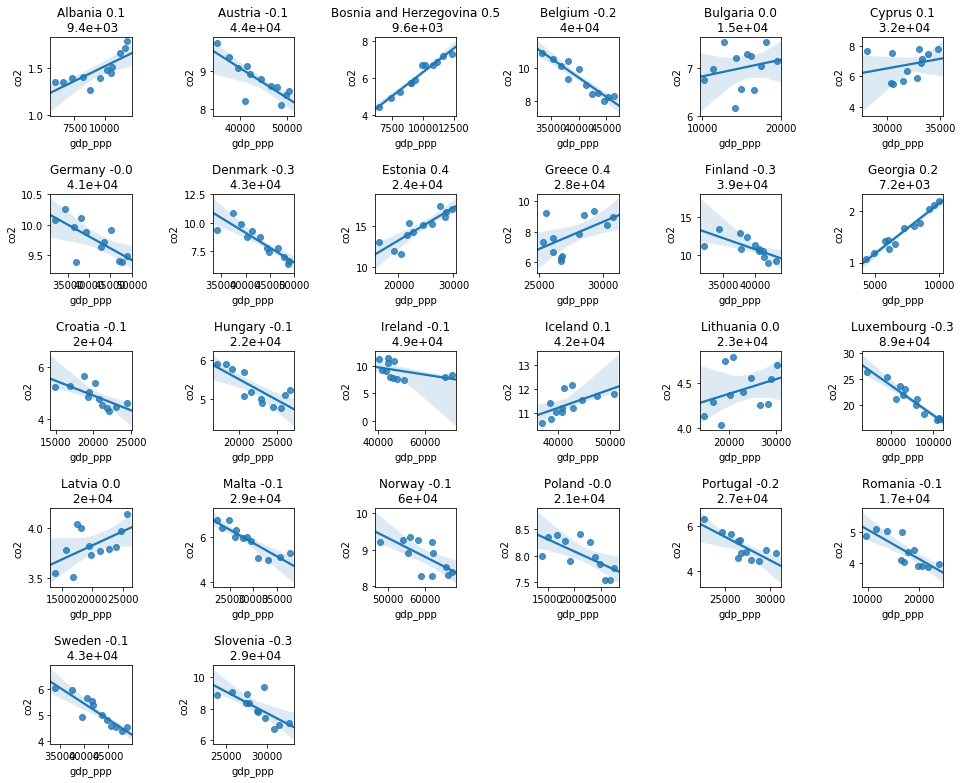

In [884]:
fig = plt.figure(figsize=(16,13))
fig.subplots_adjust(hspace=1, wspace=1)


for i in range(len(renew_countries)-3):
    temp = alldf[(alldf.country==renew_countries[i]) & (alldf.renew_typ=='Renewable energies')]
    
    #get coeffs of linear fit
    slope, intercept, r_value, p_value, std_err = stats.linregress(temp.gdp_ppp, temp.co2)
    
    ax = fig.add_subplot(5,6,i+1)
    ax = sns.regplot(temp.gdp_ppp, temp.co2)
    t = renew_countries[i]
    ax.set_title(t + ' {0:.1f}'.format(slope*1000)+ '\n {0:.2g}'.format(temp.gdp_ppp.mean()))

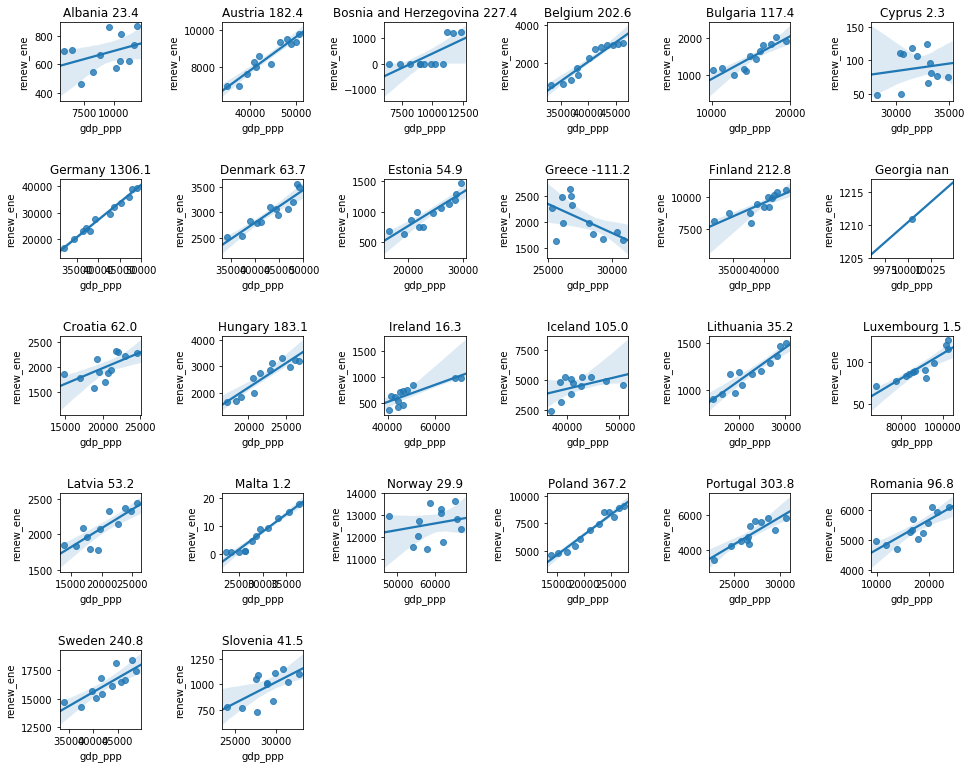

In [885]:
fig = plt.figure(figsize=(16,13))
fig.subplots_adjust(hspace=1, wspace=1)


for i in range(len(renew_countries)-3):
    temp = alldf[(alldf.country==renew_countries[i]) & (alldf.renew_typ=='Renewable energies')]
    
    #get coeffs of linear fit
    slope, intercept, r_value, p_value, std_err = stats.linregress(temp.gdp_ppp, temp.renew_ene)
    
    ax = fig.add_subplot(5,6,i+1)
    ax = sns.regplot(temp.gdp_ppp, temp.renew_ene)
    t = renew_countries[i]
    ax.set_title(t + ' {0:.1f}'.format(slope*1000))

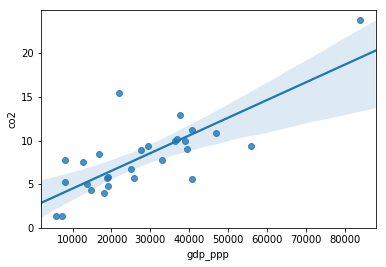

In [886]:
y=2007
filtered_alldf = alldf[(alldf.renew_typ=='Renewable energies') & (alldf.year==y)]

sns.regplot(filtered_alldf.gdp_ppp, filtered_alldf.co2)

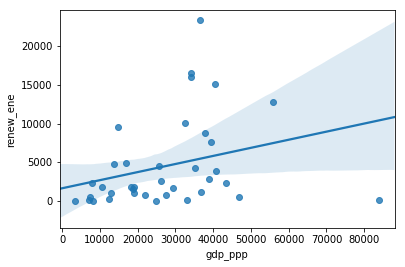

In [887]:
# seems like correlation with gdp vs co2 strong
filtered_alldf = alldf[(alldf.renew_typ=='Renewable energies') & (alldf.year==y)]

sns.regplot(filtered_alldf.gdp_ppp, filtered_alldf.renew_ene)

In [888]:
tempdf = alldf[['country', 'gdp_ppp']]
tempdf = tempdf.sort_values(by='gdp_ppp')
grouped = pd.DataFrame(tempdf.groupby(['country']).describe())
#gdp_average = grouped[['country', 'mean']]
#gdp_average
# gdp_average = grouped.unstack()
# gdp_average = gdp_average.unstack()
# gdp_average = gdp_average[:,'mean']
# gdp_average

grouped = grouped.unstack().swaplevel()
grouped.head()

         country                      
gdp_ppp  Albania                 count    168.0
         Austria                 count    168.0
         Belgium                 count    168.0
         Bosnia and Herzegovina  count    168.0
         Bulgaria                count    168.0
dtype: float64

In [940]:
gdp_average = grouped[:,:,'mean']
gdp_average = gdp_average.reset_index(level=[0,1])
gdp_average = gdp_average.drop(columns='level_0')
gdp_average = gdp_average.rename(columns={0:'gdpmean'}).sort_values(by=['gdpmean'])
gdp_average = gdp_average.dropna()
gdp_countries = gdp_average.country.unique()


In [941]:
#intersection of renewable energy countries and countries with gdp data
traincountries = [x for x in gdp_countries if x in renew_countries]

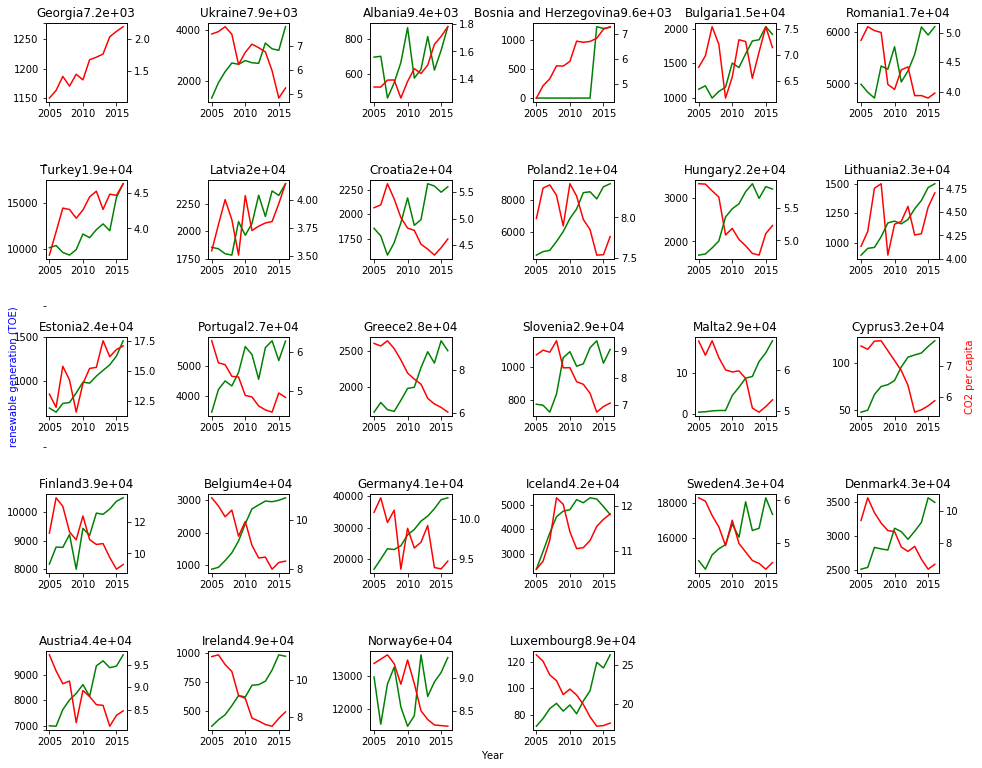

In [942]:
#do subplot for every country
fig = plt.figure(figsize=(16,13))
ax_axis = fig.add_subplot(111)#big subplot for common axis label

ax_axis.set_ylabel('renewable generation (TOE)', color='b')
ax_axis.set_xlabel('Year')
ax_axis.spines['top'].set_color('none')
ax_axis.spines['bottom'].set_color('none')
ax_axis.spines['left'].set_color('none')
ax_axis.spines['right'].set_color('none')
ax_axis.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)


ax_axis2 = ax_axis.twinx()
ax_axis2.set_ylabel('CO2 per capita', color='r')
ax_axis2.spines['top'].set_color('none')
ax_axis2.spines['bottom'].set_color('none')
ax_axis2.spines['left'].set_color('none')
ax_axis2.spines['right'].set_color('none')
ax_axis2.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

fig.subplots_adjust(hspace=1, wspace=1)



for i in range(len(traincountries)):
    temp = alldf[(alldf.country==traincountries[i]) & (alldf.renew_typ=='Renewable energies')]
    ax = fig.add_subplot(5,6,i+1)
    gdp_mean = temp.gdp_ppp.mean()
    gdp_country = traincountries[i] + '{0:.2g}'.format(gdp_mean)
    two_yaxis(ax, temp.year, temp.renew_ene, temp.co2, 'g', 'r', gdp_country)


# plt.show()